# Linear Discriminant Analysis in Python

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler

iris = pd.read_csv("../input/Iris.csv")
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [2]:
numeric_fields = ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]

sc = StandardScaler()
iris_standardised = sc.fit_transform(iris[numeric_fields])
iris_standardised

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

Unlike in PCA, the number of components passed to `LinearDiscriminantAnalysis` must be no more than $k-1$, where $k$ is the number of classes in the data.

When fitting the data, we require both the independent fields *and* the labels of the original dataset, since LDA is a supervised learning technique.

In [3]:
lda = LinearDiscriminantAnalysis(n_components=2)
iris_transformed = pd.DataFrame(
    lda.fit_transform(iris_standardised, iris["Species"])
).rename(columns={i: f"LDA{i+1}" for i, _ in enumerate(numeric_fields)})

iris_transformed["Species"] = iris["Species"]
iris_transformed

,LDA1,LDA2,Species
0,8.084953,-0.328454,Iris-setosa
1,7.147163,0.755473,Iris-setosa
2,7.511378,0.238078,Iris-setosa
3,6.837676,0.642885,Iris-setosa
4,8.157814,-0.540639,Iris-setosa
...,...,...,...
145,-5.674013,-1.661346,Iris-virginica
146,-5.197129,0.365506,Iris-virginica
147,-4.981712,-0.812973,Iris-virginica
148,-5.901486,-2.320751,Iris-virginica


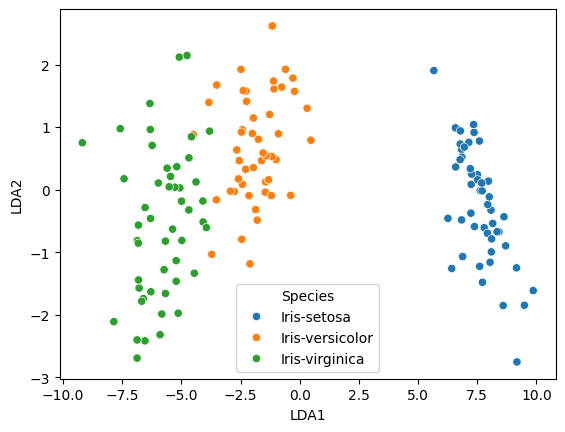

In [4]:
sns.scatterplot(data=iris_transformed, x="LDA1", y="LDA2", hue="Species")
plt.show()